# STA130 Week 7ate9 Homework

ChatGPT Chat log links:



## Question 1

The Simple Linear Regression model (SLR) is a statistical method used to estimate and find the relationship between two variables, and can be used to predict one variable (outcome variable) with another variable (predictor variable).

There are many components that make up an SLR model. In essence, the SLR model is expressed as a **linear** function, describing the relationship between the variables $x$ and $y$. More specifically, the SLR model is expressed mathematically as:

$$y=\beta_0 + \beta_1 x + \epsilon$$

There are many components to this SLR model:

- $y$, the outcome variable, also called the dependent variable, is the variable that we are trying to predict through the SLR model. It is the estimated output we get from the SLR model by inputting a predictor variable.

- $x$, the predictor variable, also called the independent variable, is the variable that is used in the SLR model to calculate the outcome variable. It is the variable that is plugged into the SLR model equation to get $y$.

- $\beta_0$ and $\beta_1$ are the intercept and slope coefficients, these are the parameters that define the SLR model equation. Just like the equation for a linear equation, $\beta_0$ describes where the y-intercept is, and $\beta_1$ describes the slope, or how steep the line is.

- Finally, $\epsilon$ is the error term, describing variations in the outcome variable that aren't explained by the change in $x$. Generally, the error term should have a normal distribution with a mean of 0, with a defined standard deviation.

Since, in a realistic situation, you never see a perfect linear relationship between $x$ and $y$, that is, for the same amount of change in $x$, we always see a same amount of the in $y$. Therefore, the error term, $\epsilon$ is very essential to making inferences using the SLR model.

With that said, is we had a SLR model like this, having actual values for $\beta_0$, $\beta_1$ and $\epsilon$, we can have an arbitrary number of $x$, the predictor variables, input them into the SLR model equation, and it would give us the same number of $y$, the outcome variables, with a normal distribution around the regression line equation of the SLR model.

Below is Python code that demonstrates the creation and use of an SLR model to generate a sample. ChatGPT has added comments on its own, but I will be adding some extra to further explain the code.

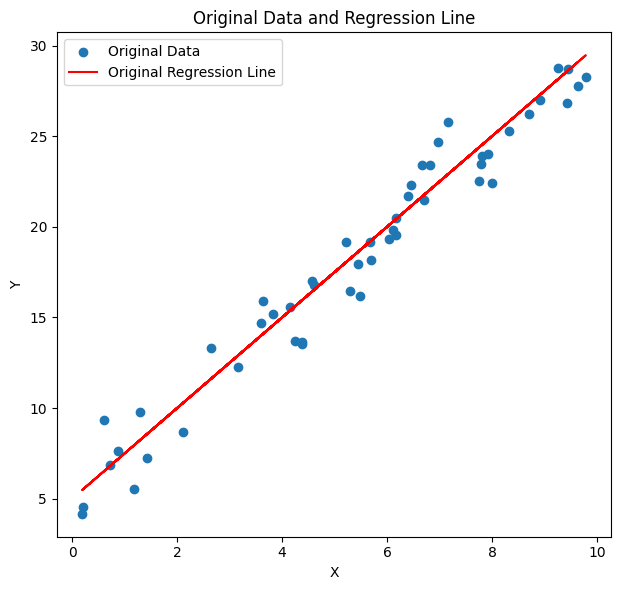

In [3]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)  # Reproducibility

# Initial synthetic data for the linear regression equation
n_points = 50    # Number of data points
x_original = np.random.uniform(0, 10, n_points)  # Independent variable/Predictor
true_slope = 2.5    # Beta_1
true_intercept = 5  # Beta_0
error_std_dev = 1.5  # Standard deviation of errors

# Generate y values/outcome variable/dependent variable with added random noise
y_original = true_slope * x_original + true_intercept + np.random.normal(0, error_std_dev, n_points)

# Plot
# I didn't bother trying to use plotly and settled with matplotlib, if that's okay...
plt.figure(figsize=(12, 6))

# Original data and model
plt.subplot(1, 2, 1)
plt.scatter(x_original, y_original, label="Original Data")
plt.plot(x_original, true_slope * x_original + true_intercept, color='red', label="Original Regression Line")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Original Data and Regression Line")
plt.legend()

plt.tight_layout()
plt.show()

As demonstrated from the code above, since the essence of a SLR model is a linear equation, we can find the outcome variable by simply multiplying the $\beta_1$ coefficient with the $x$ value, and then adding the $\beta_0$ coefficient, and then adding a normally distributed error term randomly generated using `np.random.normal`.

What we finally get is a sample consisting with a set of $x$ and $y$ points that lie around the SLR model equation, as shown in the plot above.

## Question 2

Now that we know how to generate samples from an SLR model, let's try to create a fitted SLR model from our previously generated data points.

There are many ways to fit an SLR model, such as `from scipy.stats import linregress` or using `smf.ols` from `import statsmodels.formula.api as smf`, both can create fitted SLR models, and they are essentially the same. But `smf.ols` is more powerful, providing more detailed statistical outputs, while `linregress` only provides basic regression statistics.

In [4]:
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px
# I read further instructions and it seems like I have to use plotly...

# Put the original x and y values into a DataFrame
df = pd.DataFrame({'x': x_original, 'y': y_original})
# Fit the model
model = smf.ols(formula='y ~ x', data=df).fit()

In the code above, `smf.ols` sets up specifications for the SLR model we are trying to create, and `.fit()` does the actual fitting.

What we end up with is `model`, containing all sorts of information about the SLR model created. We can view this information like the following:

In [5]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     1113.
Date:                Sun, 10 Nov 2024   Prob (F-statistic):           7.26e-35
Time:                        04:45:45   Log-Likelihood:                -87.319
No. Observations:                  50   AIC:                             178.6
Df Residuals:                      48   BIC:                             182.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.9892      0.443     11.250      0.000       4.098       5.881
x              2.4539      0.074     33.363      0.000       2.306       2.602
==============================================================================
Omnibus:                        1.199   Durbin-Watson:                   2.274
Prob(Omnibus):                  0.549   Jarque-Bera (JB):                1.213
Skew:                           0.283   Prob(JB):                        0.545
Kurtosis:                       2.487   Cond. No.                         13.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The above summary gives a very detailed reports about many aspects of the fitted SLR model, most of these we won't be really needing yet, but what we are interested in are in the second table:

In [6]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,4.9892,0.443,11.250,0.000,4.098,5.881
x,2.4539,0.074,33.363,0.000,2.306,2.602


This tables shows the most essential stuff, the y-intercept and the $x$ coefficients. The y-intercept coefficient is $\beta_0$, and the $x$ coefficient is the $\beta_1$ fom earlier. The table also shows info such as the standard error, which is used in the SLR as the error term, $\epsilon$.

The coefficients can also be found using `model.params`

In [7]:
model.params

Intercept    4.989185
x            2.453910
dtype: float64

Or as an array:

In [8]:
model.params.values

array([4.98918487, 2.45390994])

We can also use `.rsquared` to get the R-Squared value of the SLR model. The R-Squared value tells us how well the model fits the data, by indicating the proportion of total variance in the dependent variables that can be explained by the independent variable.

In [9]:
model.rsquared

np.float64(0.9586593462336801)

A R-Squared value closer to 1 indicates that the models explains a large portion of the variance in $y$, meaning that the model predicts $y$ well according to $x$, implying a stronger relationship between the two variables.

Now let's look at the created SLR model as a trendline.

In [ ]:
df['data'] = "Data"
fig = px.scatter(df, x='x', y='y', title="y vs x Regression Line", color='data', trendline="ols")
fig.add_scatter(x=df['x'], y=model.fittedvalues, line=dict(color='blue'), name="OLS trendline")
fig.show(renderer='png')

## Question 3

We've so far created a sample from an earlier defined arbitrary SLR model, and used that sample to create a new SLR model. Now, let's look at the graphs for both SLR models next to each other.

In [163]:
fig.add_scatter(x=x_original, y=true_slope * x_original + true_intercept, line=dict(color='red'), name="Original Regression Line")

It's quite apparent that the two lines are different. And they indeed are, from `model.summary()` earlier we see that the newly created SLR model had a $\beta_1$ coefficient of around 2.454, whereas our originally set SLR model had a $\beta_1$ coefficient of 2.5, therefore in the graph we see that the Original Regression Line is slightly steeper compared to the OLS trendline.

It may seem weird how, a SLR model created from a sample generated from an SLR model would appear to different parameters. But we must not forget one of the most important components of the model, the error term.

We've earlier established that the error term indicated any deviations in the value of $y$ that aren't explained by a change in $x$, and this deviation is based on a normal distribution. This is important because it is what causes the two models to deviate.

The nature of the original SLR model we have set up had predefined values for all of its parameters. Such as a $\beta_1$ of 2.5 and $\beta_0$ of 5, and so on. However, the sample we have created was based on a simulation of the relationship representedby the original SLR model, and this simulation includes randomness.

For this we should look into the code created for the first question. When creating our sample, we used `np.random.normal` to create the error term. Although being a normal distribution, it is random. Since the simulated sample contains randomness from the original model, the SLR model created from this sample will therefore be slightly different from the original SLR model.

## Question 4

We've shown earlier how `model.summary().tables[1]` shows the most essential information about the SLR model, that is, including the x-coefficient $\beta_1$ and the y-intercept coefficient $\beta_0$. (It gives the same essential information as `model.params`)

Now, `model.fittedvalues` are predicted values based on the parameters for the created SLR model, by inputting the $x$ (predictor) values into the SLR model equation with the values given by `model.params` gives the values for $y$, the outcome variable.

## Question 5

*ChatGPT started spitting gibberish when I asked questions about how the OLS method worked, so I had to do some manual researching...*

The method we used earlier to create the SLR model from the sample was `smf.ols`, the OLS here stands for "ordinary least squares", one of the methods for creating linear regression models.

We've also earlier explained that the essence of an SLR model is a line, or a linear function, with a slope and y-intercept. How does the OLS method choose this line? In short, it's all about trying to find the **'least squares',** that is, **to minimize the sum of squared residuals**. Okay... But, what are residuals? Why squared?

When creating a SLR model using the OLS method, each data points have a residual, or error, that measures the difference between the observed $y$ value of the data points, and the predicted $y$ from calculations with the SLR model equation.

The residual is represented as:

$$\epsilon_i = y_i - \hat{y}_i$$

where $y_i$ is the observed value of the dependent variable from the sample/data points. And $\hat{y_i}$ is the predicted value from the SLR model equation, based on $\beta_1$ and $\beta_0$.

The goal of the OLS method is to find the least value for the sum of squared residuals, or $SSR$:

$$SSR = \sum^n_{i=1} \epsilon_i^2 = \sum^n_{i=1}(y_1-(\beta_0 + \beta_1 x_i))^2$$

Where n is the number of observations (total amount of data points).

The OLS method then finds the best values for $\beta_0$ and $\beta_1$ that minimized the $SSR$, by taking partial derivatives of $SSR$ with respect to $\beta_0$ and $\beta_1$. The exact math process won't be explained here, but the resulting values for $\beta_0$ and $\beta_1$ finally define the best-fit line for the SLR model.

The most important point about the OLS method and the SSR, is that it is based on the sum of **SQUARED** residuals. There are many reasons as to why **SQUARED** is used for calculations in OLS:

- It allows us to derive a closed form solution, that is, an exact formula that allows us to directly calculate the values of $\beta_0$ and $\beta_1$, without needing complex calculations. This also makes the method computationally efficient, since explicit formulas means we can simply input the numbers into the formula and it will give us the exact results.

- It penalizes larger errors more heavily, since smaller numbers squared makes a small number, but larger numbers squares end up with a very large number. This makes the OLS method generate a more accurate fit for the majority of data points.

- Since squaring a number 100% makes it positive, having squares in OLS method ensures that the resulting line isn't overly influenced by whether the error is negative or positive.

The code block below and the plot gives a visualization to briefly explain the OLS method.

In [6]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px

n,x_min,x_range,beta0,beta1,sigma = 20,5,5,2,3,5
x = stats.uniform(x_min, x_range).rvs(size=n)
errors = stats.norm(loc=0, scale=sigma).rvs(size=n)
Y = beta0 + beta1 * x + errors

df = pd.DataFrame({'x': x, 'y': Y})
model_data_specification = smf.ols("Y~x", data=df) 
fitted_model = model_data_specification.fit() 

df['Data'] = 'Data' # hack to add data to legend 
fig = px.scatter(df, x='x',  y='y', color='Data', 
                 trendline='ols', title='Y vs. x')

# This is what `trendline='ols'` is
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")

x_range = np.array([df['x'].min(), df['x'].max()])
y_line = beta0 + beta1 * x_range
fig.add_scatter(x=x_range, y=y_line, mode='lines',
                name=str(beta0)+' + '+str(beta1)+' * x', 
                line=dict(dash='dot', color='orange'))

# Add vertical lines for residuals
for i in range(len(df)):
    fig.add_scatter(x=[df['x'][i], df['x'][i]],
                    y=[fitted_model.fittedvalues[i], df['y'][i]],
                    mode='lines',
                    line=dict(color='red', dash='dash'),
                    showlegend=False)
    
# Add horizontal line at y-bar
fig.add_scatter(x=x_range, y=[df['y'].mean()]*2, mode='lines',
                line=dict(color='black', dash='dot'), name='y-bar')

fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

As seen from the graph output above, we see many different things, I will explain what they are and what they do:

- The dotted yellow line, labelled as $2+3*x$, represents the original linear function used to generate the data.

- The blue line, labelled as "trendline='ols'", represents the output SLR model equation from the OLS method. Together with the original linear function line, we can see how closely the generated SLR model line form the OLS method models the original function.

- y-bar, representing the average value of $y$, $\bar{y}$. From this we can see the distance between each of the data points and the sample average, which is used to calculate the accuracy of the model with $R^2$.

- Blue dots, labelled as "Data", are the data points generated from the original function.

- The red dotted lines, represent the residuals, as explained before, are the difference between the $y_i$ and $\hat{y}_i$. These are exactly what the OLS method uses and attemps to minimize during the calculation for the SLR model.

## Question 6

1. `1-((Y-fitted_model.fittedvalues)**2).sum()/((Y-Y.mean())**2).sum()` is the sum of squared errors divided by the total sum of squares. We can break this down into multiple parts to take a closer look:

    For the first half of the division, `Y` is the actual $y$ value of a datapoint, and `fitted_model.fittedvalues` is the $\hat{y}$ value predicted by the SLR model. The difference between these two are squared and added together for all datapoints. This is also called the sum of squared errors, SSE. It represents the variability in y that is explained by the model.

    For the second half, again, `Y` is the actual $y$ value, and `Y.mean()` is the mean value $\bar{y}$ of all the $y$ values in the dataset. This difference is also squared, and is called the total sum of squares, SST. It represents the overall variability in y.

    Together, the division makes the expression $\frac{SSE}{SST}$, which, when is subtracted with 1, is how the R-squared value is calculated:

    $$R^2 = \frac{SSR}{SST} = 1 - \frac{SSE}{SST}$$

    The R-squared value is exactly what "the proportion of variation in Y explained by the model" is, and therefore the expression can be interpreted that way.

2. `fitted_model.rsquared` is the direct way to get the R-squared value of a fitted SLR model. since the R-squared measures "the proportion of variation in Y explained by the model", it can be interpreted as a measure of the accuracy of the model:

    If $R^2$ is close to 1, it means that SSR is almost equal to SST, meaning that the variation explained by the model is almost equal to all the variation in the dataset, meaning that the model represents the dataset very well, and is therefore very accurate.

    If $R^2$ is close to 0, SSR is far from close to SST, meaning that very little of the variation is explained by the model, and therefore means the model is not as accurate.'

Both 3. and 4. are other ways of expressing $R^2$, for 3, `np.corrcoef()` computes the correlation matrix between the observed values `Y` and the fitted values `fitted_model.fittedvalues`, `[0,1]` then accessed the correlation coefficients between `Y` and the fitted values, which is one way $R^2$ is represented, the correlation between observed values and predicted values.

4 is essentially the same thing, like we've seen before in the equation for how $R^2$ is calculated, there are two ways. In 4, the correlation coefficients are calculated by directly using the observed `Y` values and the observed `x` values.

## Question 7



The SLR model relies on many assumptions for to be compatible with a certain piece of data. Without meeting these assumptions, the SLR model might not be a good representation/estimation of the relationship between $x$ and $y$ values, and it therefore will not be able to give an accurate or reliable prediction.

We can look at some of these assumptions by using the example dataset below.

In [164]:
import pandas as pd
from scipy import stats
import plotly.express as px
from plotly.subplots import make_subplots

# This data shows the relationship between the amount of fertilizer used and crop yield
data = {'Amount of Fertilizer (kg) (x)': [1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 
                                          2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 
                                          4.6, 4.8, 5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 
                                          6.4, 6.6, 6.8, 7, 7.2, 7.4, 7.6, 7.8, 8, 
                                          8.2, 8.4, 8.6, 8.8,9, 9.2, 9.4, 9.6],
        'Crop Yield (tons) (Y)': [18.7, 16.9, 16.1, 13.4, 48.4, 51.9, 31.8, 51.3, 
                                  63.9, 50.6, 58.7, 82.4, 66.7, 81.2, 96.5, 112.2, 
                                  132.5, 119.8, 127.7, 136.3, 148.5, 169.4, 177.9, 
                                  186.7, 198.1, 215.7, 230.7, 250.4, 258. , 267.8, 
                                  320.4, 302. , 307.2, 331.5, 375.3, 403.4, 393.5,
                                  434.9, 431.9, 451.1, 491.2, 546.8, 546.4, 558.9]}
df = pd.DataFrame(data)
fig1 = px.scatter(df, x='Amount of Fertilizer (kg) (x)', y='Crop Yield (tons) (Y)',
                  trendline='ols', title='Crop Yield vs. Amount of Fertilizer')

# Perform linear regression using scipy.stats
slope, intercept, r_value, p_value, std_err = \
    stats.linregress(df['Amount of Fertilizer (kg) (x)'], df['Crop Yield (tons) (Y)'])
# Predict the values and calculate residuals
y_hat = intercept + slope * df['Amount of Fertilizer (kg) (x)']
residuals = df['Crop Yield (tons) (Y)'] - y_hat
df['Residuals'] = residuals
fig2 = px.histogram(df, x='Residuals', nbins=10, title='Histogram of Residuals',
                    labels={'Residuals': 'Residuals'})

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Crop Yield vs. Amount of Fertilizer', 
                                    'Histogram of Residuals'))
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
fig.update_layout(title='Scatter Plot and Histogram of Residuals',
    xaxis_title='Amount of Fertilizer (kg)', yaxis_title='Crop Yield (tons)',
    xaxis2_title='Residuals', yaxis2_title='Frequency', showlegend=False)

fig.show(renderer='png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

One of the most obvious assumptions the SLR model is based on, and the dataset does not meet, is linearity. The creation of a SLR model assumes that the dataset used to create it has a linear relationship between the dependent (predictor) and independent (outcome) variables. The dataset however, is showing a curved shape, not a linear shape. This makes the SLR model no longer be a good representation of the dataset, instead, a polynomial fit model might be more suitable based on the parabolic shape of the dataset trend.

Another one of the assumptions for the SLR model is the normality of residuals. Where the residuals are approximately normally distributed. However, from the plot of the dataset showing the histogram of residuals, not only do we see a right skewness, we also see a multimodal shape, where there are multiple peaks. normality of residuals is important for making valid statistical inferences.

Other assumptions inclue Independence, where each of the observations in the dataset should be independent of each other, meaning that the result of one observation should not affect the other; or Homoscedasticity, where the spread of residuals should be roughly the same for all values of $x$.

## Question 8

In [165]:
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm

# The "Classic" Old Faithful Geyser dataset: ask a ChatBot for more details if desired
old_faithful = sns.load_dataset('geyser')

# Create a scatter plot with a Simple Linear Regression trendline
fig = px.scatter(old_faithful, x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions", 
                 trendline='ols')#'lowess'

# Add a smoothed LOWESS Trendline to the scatter plot
lowess = sm.nonparametric.lowess  # Adjust 'frac' to change "smoothness bandwidth"
smoothed = lowess(old_faithful['duration'], old_faithful['waiting'], frac=0.25)  
smoothed_df = pd.DataFrame(smoothed, columns=['waiting', 'smoothed_duration'])
fig.add_scatter(x=smoothed_df['waiting'], y=smoothed_df['smoothed_duration'], 
                mode='lines', name='LOWESS Trendline')

fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

In this setup for the "geyser" dataset, we have set the dependent variable (outcome) to be the duration of the geyser eruption, and the independent variable (predictor) to be the waiting time for the geyser to erupt. Therefore, we are looking at the relationship between the waiting time and the duration of the geyser.

A null hypothesis in terms of the SLR model in this case, would be looking at whether or not the waiting time and duration is a linear relation. Thus, our null hypothesis would be that the waiting time of the geyser does not have a linear relationship with the duration of the geyser.

To test our null hypothesis, we should look at the parameters of the SLR model, specifically the x-coefficient, or the slope of the model. Since the slope of the model most directly represents the relationship between the dependent and independent variables, by indicating how much $y$ changes per unit of $x$ changes. When there is a positive relationship, we should see $\beta_1 0$, and negative relationship when $\beta_1 < 0$, and no relationship when $\beta_1 = 0$.

To test for this, we can loop at the p-value for the independent variable coefficient, or the slope, which is conveniently provided in the `fitted_model.summary()` report.

In [1]:
import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Sun, 10 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        04:49:38   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Or, we could also:

In [167]:
fitted_model.pvalues['waiting']

np.float64(8.129958506617471e-100)

From both ways of retrieving the p-value for the x-coefficient, we see that the value is very, incredibly small. This means that we have very strong evidence against the null hypothesis, **therefore we reject the null hypothsis.**

## Question 9

Indeed, looking at the scatterplot for waiting time and durations, we see a big jump in the duration of the geyser around a waiting time of 63 minutes. So, let's separate the two parts of the data and look at whether or not the waiting time and durations have a linear relationship within the parts.

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


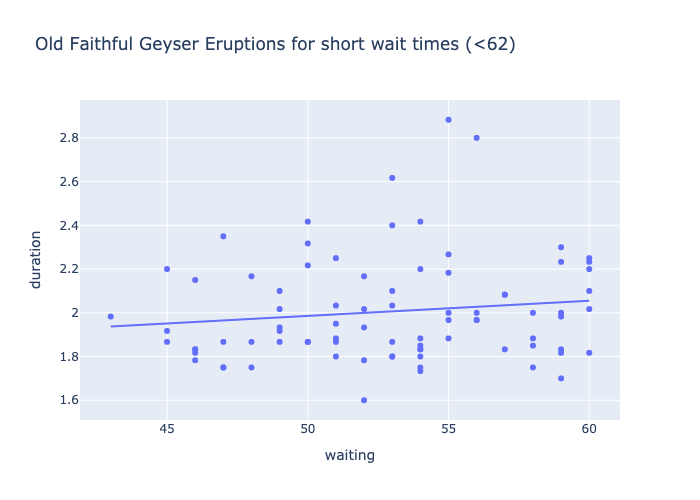

In [168]:
import plotly.express as px
import statsmodels.formula.api as smf

short_wait_limit = 62 # 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer='png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4140      0.288      4.915      0.000       0.842       1.986
waiting        0.0114      0.005      2.127      0.036       0.001       0.022


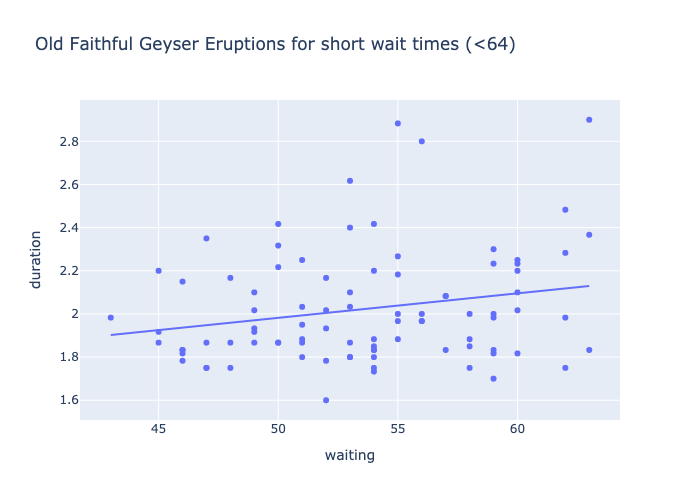

In [169]:
short_wait_limit = 64 # 66
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer='png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8619      0.327      2.637      0.010       0.213       1.511
waiting        0.0221      0.006      3.704      0.000       0.010       0.034


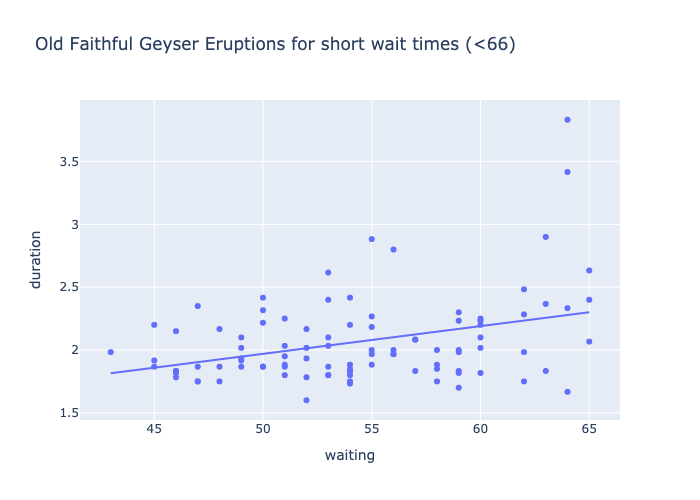

In [170]:
short_wait_limit = 66
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer='png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

We break up the first half of the dataset by first looking at those with a relatively shorter waiting time, and we take cutoffs at three different times, 62, 64 and 66. For each increment, the upper limit gets closer and closer and even passes what seems to be the points where we see the huge jump in geyser duration. And indeed, every time we increase, we see a steeper slope for the SLR model created. 

Looking at the p-values for each increment, for a cutoff of 62 minutes, we have a p-value of 0.238, representing no evidence against the null hypothesis, at this cutoff, we fail to reject the null hypothesis of the waiting time and duration has no linear relationship.

At the cutoff of 64 minutes, we get a p-value of 0.036, representing a moderate evidence against the null hypothesis, successfully rejecting the null hypothesis.

And finally at 66 minutes, we get the p-value of a very small number, indicating a very strong evidence against the null hypothesis, also rejecting the null hypothesis.

As explained earlier, we see a stronger evidence against the null hypothesis because our cutoff is getting closer and closer to the jump in increase of duration, therefore creating a greater positive slope. With the shorter cutoff of 62 minutes, and within the context of short waiting times, the evidence in the data for a relationship between the waiting time and duration show very different results.

## Question 10

After looking at the shorter waiting times, now let's look at the relatively longer waiting times.

In [2]:
import plotly.express as px
from scipy import stats

long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[long_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (>"+str(long_wait_limit)+")", 
                 trendline='ols')
fig.show(renderer='png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3520      0.476      7.049      0.000       2.413       4.291
waiting        0.0122      0.006      2.091      0.038       0.001       0.024


### Part 1

For the first part, we will take bootstrapped samples from the 160 long wait times, and create fitted SLR models, and take the fitted slope coefficients of the fitted models:

In [1]:
import plotly.express as px

np.random.seed(1)  # Reproducibility

fitted_slope_coefficients = []
long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit
num_iterations = 1000
for _ in range(num_iterations):
    sample = old_faithful[long_wait].sample(frac=1, replace=True)
    model = smf.ols('duration ~ waiting', data=sample).fit()
    fitted_slope_coefficients.append(model.params['waiting'])

fig = px.histogram(x=fitted_slope_coefficients, title='Histogram of Fitted Slope Coefficients')
fig.show()

# 95% Confidence Interval
confidence_interval = np.percentile(fitted_slope_coefficients, [2.5, 97.5])
print('95% Confidence Interval:', confidence_interval)

mean_fitted_slope = np.mean(fitted_slope_coefficients)
print('Mean of Fitted Slope Coefficients:', mean_fitted_slope)

NameError: name 'np' is not defined

By running the simulation 1000 times, taking bootstrapped samples and creating an SLR model with the samples, we get a mean of the fitted slope coefficient of 0.0121, and a 95% confidence interval of 0.00046 and 0.02402.

### Part 2

Now let's try to test for a null hypothesis based on our observations for the fitted SLR model.

In [23]:
import pandas as pd
import numpy as np

num_iterations = 1000
x_coefficients = []

np.random.seed(1) # reproducibiklthfuty

for i in range(num_iterations):
    old_faithful_simulation = old_faithful[long_wait].copy()
    old_faithful_simulation['duration'] = 1.65 + 0*old_faithful_simulation.waiting + stats.norm(loc=0, scale=0.37).rvs(size=long_wait.sum())
    simulated_fitted_model = smf.ols('duration ~ waiting', old_faithful_simulation).fit()
    x_coefficients.append(simulated_fitted_model.params['waiting'])

fitted_model = smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit()
observed_coefficient = fitted_model.params['waiting']
p_value = (np.sum(x_coefficients >= observed_coefficient) + np.sum(x_coefficients <= -observed_coefficient)) / len(x_coefficients)

df = pd.DataFrame(x_coefficients, columns=['x-coefficients'])
plt = px.histogram(df, x='x-coefficients')
plt.show()

print(f"p-value: {p_value}")
fitted_model.summary().tables[1]


p-value: 0.029


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,3.3520,0.476,7.049,0.000,2.413,4.291
waiting,0.0122,0.006,2.091,0.038,0.001,0.024


### Part 3

For the 95% Bootstrapped confidence interval, the interval does not contain 0. And for the simuated SLR model x-coefficients, the p-value is matching the p-value for the fitted SLR model based on the original long wait time data, such that both p-values provide moderate evidence against the null hypothesis.

Combining these two, we can conclude that there is a linear relationship between the waiting time and durations for the long wait time type geysers.

## Question 11

In Question 9 and 10, we attemped to observe whether or not there was a linear relationship between waiting time and duration of the geyser within long and short waiting times. However, our method of separating the two parts was rather too rough, which was directly selecting a certain waiting time $x$ and setting that as the upper/lower bound for the two parts.

There are many problems with this process, by setting an artificial threshold, selecting where the threshold should be is a difficult process, and often introduces bias by oversimplifying the "long" and "short" patterns of the geyser wait times. Arbitraily selecting thresholds like this will influence the resulting SLR model created, causing it to predict outcomes innacurately, or not be reflecting the actual nature of the data.

In fact, we have already seen in problem in question 9, when we moved the upper limit from 62, to 64, and finally to 66, we saw that the SLR model parameters changed because we were getting closer and closer to the big jump/increase in the durations.

Therefore, instead of arbitrarily selecting the threshold, we should use an indicator variable in the SLR model specification, to examine how the indicator, which we will call $k_i$, (referring to the "kind" column in the dataset), also may have effects in the duration. In this way, instead of defining a certain "limit" to separate two sections of the dataset, we examine how an objective characteristic of the geyser, being "long" and "short" waiting times, reflects the duration of the geyser, making the result more meaningful and interpretable.

In fact, we can observe this from the following box plot:

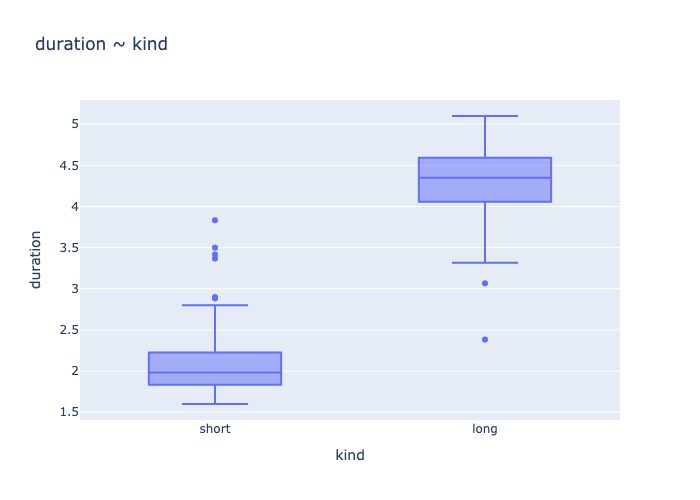

In [173]:
import plotly.express as px

fig = px.box(old_faithful, x='kind', y='duration', 
             title='duration ~ kind',
             category_orders={'kind': ['short', 'long']})
fig.show(renderer='png')

It's easy to notice how, instead of having a string cutoff point like we've done before, using indicator variables to "kategorize" the dataset makes a much more natural setup.

We can setup the SLR model specification to include indicator variables like the following:

In [174]:
model_1 = smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit()

model_1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


*I would try to express the indicator variable with the mathematical equation representation with LaTeX but for some reason my LaTeX interpreter isn't rendering the results correctly...*

*Oop, nevermind, I think Prof. Schwarz made a mistake in the LaTeX code, I fixed it:*

$$\large Y_i = \beta_{\text{intercept}} + 1_{[\text{"long"}]}(k_i)\beta_{\text{contrast}} + \epsilon_i \quad \text{ where } \quad \epsilon_i \sim \mathcal N\left(0, \sigma\right)$$

*For some reason he wrote \text{k_i} where it should be just k_i*. Anyways, moving on...

From the SLR model specification equation above, the $1_{[\text{"long"}]}$ acts as a switch that is swiched on or off based on whether or not the kind column matches the specification. When the kind column is "long", the switch is on, and the term is a 1, making the entire $\beta_\text{constrast}$ term valid. When the kind column is not "long", but "short", the switch is off, and the term is a 0. In this way, we create two parallel lines in our SLR model, where each line takes into account for one of the indicator variables.

We see from the summary table that the resulting model has a very small p-value, suggesting very strong evidence against the null hypothesis of the two groups have no difference.

## Question 12

In [175]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats
import numpy as np

model_residuals = {
    '<br>Model 1:<br>All Data using slope': smf.ols('duration ~ waiting', data=old_faithful).fit().resid,
    '<br>Model 2:<br>Short Wait Data': smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().resid,
    '<br>Model 3:<br>Long Wait Data': smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().resid,
    '<br>Model 4:<br>All Data using indicator': smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().resid
}

fig = make_subplots(rows=2, cols=2, subplot_titles=list(model_residuals.keys()))
for i, (title, resid) in enumerate(model_residuals.items()):

    if i == 1:  # Apply different bins only to the second histogram (index 1)
        bin_size = dict(start=-1.9, end=1.9, size=0.2)
    else:
        bin_size = dict(start=-1.95, end=1.95, size=0.3)

    fig.add_trace(go.Histogram(x=resid, name=title, xbins=bin_size, histnorm='probability density'), 
                  row=int(i/2)+1, col=(i%2)+1)
    fig.update_xaxes(title_text="n="+str(len(resid)), row=int(i/2)+1, col=(i%2)+1)    
    
    normal_range = np.arange(-3*resid.std(),3*resid.std(),0.01)
    fig.add_trace(go.Scatter(x=normal_range, mode='lines', opacity=0.5,
                             y=stats.norm(loc=0, scale=resid.std()).pdf(normal_range),
                             line=dict(color='black', dash='dot', width=2),
                             name='Normal Distribution<br>(99.7% of its area)'), 
                  row=int(i/2)+1, col=(i%2)+1)
    
fig.update_layout(title_text='Histograms of Residuals from Different Models')
fig.update_xaxes(range=[-2,2])
fig.show(renderer='png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

A histogram that suggest the plausibility of the assumption that the distirbution of error terms is normal should show a normally distributed, symmetric shape, shouldn't show signs of being multimodal, having outliers, or skewness.

This is why Model 1 fits the description the most, as Model 2 shows signs of right-skewness and asymmetry, Model 3 shows signs of left-skewness and asymmetry, and Model 4 not only shows asymmetry, but also has outliers outside of the normal distribution area.

## Question 13

### Part (a)

**Permutation test:**

For method (A), we do a permuation test to show that there are no difference in duration between short and long times. A permutation test involves shuffling up the indicator variables to create what are called "pseudo-groups". These shuffuled groups, since being randomly split up, should create the assumption that there are no difference between the groups.

We then split the data into these groups, and calculate the means of the observed values for each of the groups, and calculate the difference. This generates a simulated "mean difference" for the null hypothesis. This shuffle-split-calcualate process is repeated many times to build a distribution of mean differences. This distribution maps out what difference we would expect under completly random groupings, meaning no relation between group and duration.

Finally, we look at where the real observed mean difference is by taking the mean of each of the groups in the original dataset, by taking the p-value from the mean different distribution. If the results are statistically significant, it may show that the groupings does have an effect on our observations.

**Bootstrapped confidence interval:**

Similar to method (A), which involves calculating the mean difference and creating a distribution, the using a bootstrapped confidence interval involves creating bootstrapped samples from each of the groups in the original dataset. We take the difference in means between the two bootstrapped samples, and repeated many times to create the distribution.

With this distribution, we create a 95% confidence interval and see if it contains zero. If it does not, it means that the two groups have different means, and therefore group does influces the observed data, since zero means no difference between means.

### Part (b)

The main difference between these two methods and the indicator variable method we preivously explored, is that the indicator variable method is done under a regression framework, more specifically, it requires the assumption of linearity within the observations, and assumes that each group has a normal distribution and homogeneity of variances. Essentially, it requires the assumptions we've mentioned in [Question 7](#question-7) to be compatible with the SLR model framework. While the bootstrapped confidence interval method and the permutation test method makes minimal assumptions, where the permutation test makes the assumption that observations are exchangable under the null hypothesis, and the bootstrapped CI method assumes that only the samples are representative of the population.

Looking at how the analysis are interpreted, both the indicator variable method and the permuation test method are interpreted by obtaining a p-value to look at where the observation lies within a distribution, while the bootstrapped CI method uses a confidence interval to test for a null hypothesis.

Finally, both the bootstrapped CI and the permutation method use resampling to avoid those previously mentioned distributional assumptions, while the indicator variable method is based solely on the observed data.


## Question 14

Yes